# Ruter Sju Data Analysis
Combinations for bot intelligence (number on list is combinationID):
1. all smart bots
2. 1 smart, rest dumb
3. half smart, half dumb
4. 1 smart, rest random
5. half smart, half random
6. 1 dumb, rest random
7. 1 random, rest dumb
8. half dumb, half random

### Data collection
- 5000 games with combination 1.
- 400 games for every other combination.

### Insights
- Does having extremes matter? Does having ace extremes matter
- Does having center or opener cards matter?
- Does having the block early matter? 
- Does being the first with the block make winning more likely? / Round with first block vs winning probability?
- Does having the block a lot make winning more likely?
- Correlation between time with block and winning?
- Does starting give you an advantage?
- How often do players get the block, how often do players NOT get the block at all?
- Which strategy is best?
- How rare is it to never get the block?

### Further steps
- GUI to show graphs, alter number of players, etc.
- Generate data with a lot of players, bigger range
- Slider for numPlayers, etc.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("ruter-sju-data.csv", index_col=False)
data.head()

,numPlayers,numSmart,numDumb,numRandom,game,turns,rounds,playerName,kind,cardsDealt,...,mostRoundsWithBlockProp,turnWithFirstBlock,turnWithFirstBlockProp,numCenter,numOpener,numExtremes,suit0Extremes,suit1Extremes,suit2Extremes,suit3Extremes
0,3,3,0,0,0,68,20,0,smart,18,...,0.300000,2,0.10,1,1,3,1,1,1,0
1,3,3,0,0,0,68,20,1,smart,17,...,0.300000,8,0.40,2,2,3,1,0,1,1
2,3,3,0,0,0,68,20,2,smart,17,...,0.300000,13,0.65,1,5,2,0,1,0,1
3,3,3,0,0,1,81,30,0,smart,18,...,0.300000,9,0.30,3,1,2,0,0,0,2
4,3,3,0,0,1,81,30,1,smart,17,...,0.133333,0,0.00,0,4,2,0,1,1,0


## Data Cleaning

Create a "combination id" column based on the combinations above

In [4]:
data["combinationID"] = np.where(
    data["numPlayers"] == data["numSmart"], 1, np.where(
        (data["numSmart"] == 1) & (data["numDumb"] == data["numPlayers"] - 1), 2, np.where(
            (data["numSmart"] == data["numPlayers"]//2) & (data["numDumb"] == data["numPlayers"] - data["numPlayers"]//2), 3, np.where(
                (data["numSmart"] == 1) & (data["numRandom"] == data["numPlayers"] - 1), 4, np.where(
                    (data["numSmart"] == data["numPlayers"]//2) & (data["numRandom"] == data["numPlayers"] - data["numPlayers"]//2), 5, np.where(
                        (data["numDumb"] == 1) & (data["numRandom"] == data["numPlayers"] - 1), 6, np.where(
                            (data["numRandom"] == 1) & (data["numDumb"] == data["numPlayers"] - 1), 7, 8
                        )
                    )
                )
            )
        )
    )
)

## Insights

In [5]:
smart_games = data[data["combinationID"] == 1]
smart_games

,numPlayers,numSmart,numDumb,numRandom,game,turns,rounds,playerName,kind,cardsDealt,...,turnWithFirstBlock,turnWithFirstBlockProp,numCenter,numOpener,numExtremes,suit0Extremes,suit1Extremes,suit2Extremes,suit3Extremes,combinationID
0,3,3,0,0,0,68,20,0,smart,18,...,2,0.100000,1,1,3,1,1,1,0,1
1,3,3,0,0,0,68,20,1,smart,17,...,8,0.400000,2,2,3,1,0,1,1,1
2,3,3,0,0,0,68,20,2,smart,17,...,13,0.650000,1,5,2,0,1,0,1,1
3,3,3,0,0,1,81,30,0,smart,18,...,9,0.300000,3,1,2,0,0,0,2,1
4,3,3,0,0,1,81,30,1,smart,17,...,0,0.000000,0,4,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123595,6,6,0,0,4999,76,11,1,smart,9,...,3,0.272727,0,4,1,0,0,1,0,1
123596,6,6,0,0,4999,76,11,2,smart,9,...,3,0.272727,0,2,3,0,1,1,1,1
123597,6,6,0,0,4999,76,11,3,smart,9,...,8,0.727273,1,1,2,0,1,0,1,1
123598,6,6,0,0,4999,76,11,4,smart,8,...,7,0.636364,1,1,0,0,0,0,0,1


### 1. Does having extreme/opener/center cards matter? 

In [6]:
cardColumn = "numExtremes"

In [7]:
data.columns

Index(['numPlayers', 'numSmart', 'numDumb', 'numRandom', 'game', 'turns',
       'rounds', 'playerName', 'kind', 'cardsDealt', 'roundsPlayer',
       'startingPosition', 'finalPosition', 'timesBlockTaken',
       'totalRoundsWithBlock', 'totalRoundsWithBlockProp',
       'mostRoundsWithBlock', 'mostRoundsWithBlockProp', 'turnWithFirstBlock',
       'turnWithFirstBlockProp', 'numCenter', 'numOpener', 'numExtremes',
       'suit0Extremes', 'suit1Extremes', 'suit2Extremes', 'suit3Extremes',
       'combinationID'],
      dtype='object')

Get frequency of each final position per number of extremes cards group by number of players. The following DataFrame shows the probability of this occuring in a game; for example the probability you are dealt 0 extremes and win.

In [8]:
df = smart_games.groupby(["numPlayers", cardColumn, "finalPosition"]).agg(frequency = ("numPlayers", "count")).reset_index().sort_values(by = ["numPlayers", cardColumn, "finalPosition"])
df = df.merge(df.groupby("numPlayers").agg(total_population_size = ("frequency","sum")), on = "numPlayers")
df = df.merge(df.groupby(["numPlayers", cardColumn]).agg(population_size = ("frequency","sum")), on = ["numPlayers", cardColumn])
df["probabilityOccuring"] = df["frequency"]/df["total_population_size"]
df["probabilityEnding"] = df["frequency"]/df["population_size"]

df columns:
- total_population_size is total number of players in simulation per size of game (3\*5000, 4\*5000, etc)
- population_size is number of players that got X number of extreme cards per game size
- probabilityEnding is probability of ending on that final position at the end of the game
- probabilityOccuring is the probability of that path occuring

In [9]:
winning_df = df[df["finalPosition"] == 0]
winning_df[winning_df["numPlayers"] == 3]

,numPlayers,numExtremes,finalPosition,frequency,total_population_size,population_size,probabilityOccuring,probabilityEnding
0,3,0,0,293,15000,417,0.019533,0.702638
2,3,1,0,1199,15000,2187,0.079933,0.548240
5,3,2,0,1656,15000,4262,0.110400,0.388550
8,3,3,0,1271,15000,4496,0.084733,0.282696
11,3,4,0,454,15000,2581,0.030267,0.175901
14,3,5,0,118,15000,884,0.007867,0.133484
17,3,6,0,9,15000,154,0.000600,0.058442


Bar chart parameters:

In [10]:
diff = winning_df["numPlayers"].max() - winning_df["numPlayers"].min()
width = 1/(diff+2)
r = np.arange(winning_df[cardColumn].max()+1)
figsize = (12,8)

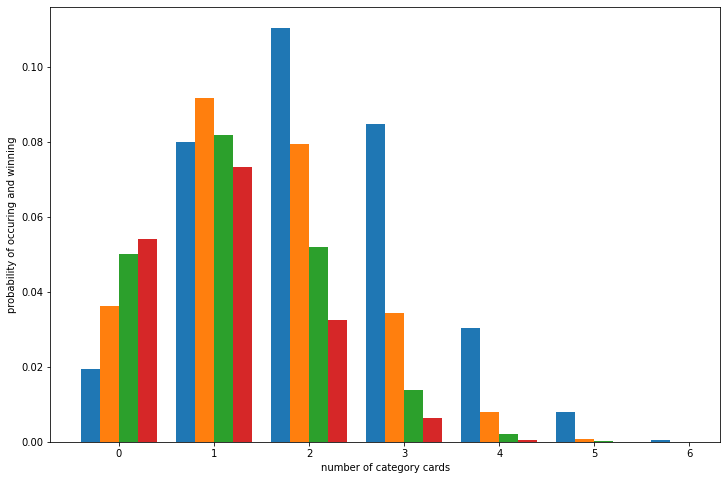

In [11]:
plt.figure(figsize=figsize)
for i, num in enumerate(range(winning_df["numPlayers"].min(), winning_df["numPlayers"].max()+1)):
    plt.bar(x = np.arange(winning_df[winning_df["numPlayers"] == num][cardColumn].max()+1)+i*width, height = winning_df[winning_df["numPlayers"] == num]["probabilityOccuring"], width = width, align = "center")
plt.xticks(r+width*diff/2, r)
plt.xlabel("number of category cards")
plt.ylabel("probability of occuring and winning")
plt.show()

Next I want to find the probability that you win just by looking at the number of certain category cards you have. 

The following plot shows the probability that you win knowing that you have a certain number of category cards. For example when playing with 3 people, you have around a 70% chance of winning if you have 0 extreme cards. This percentage is based on a sample size of 293 players (it happened 293 times).

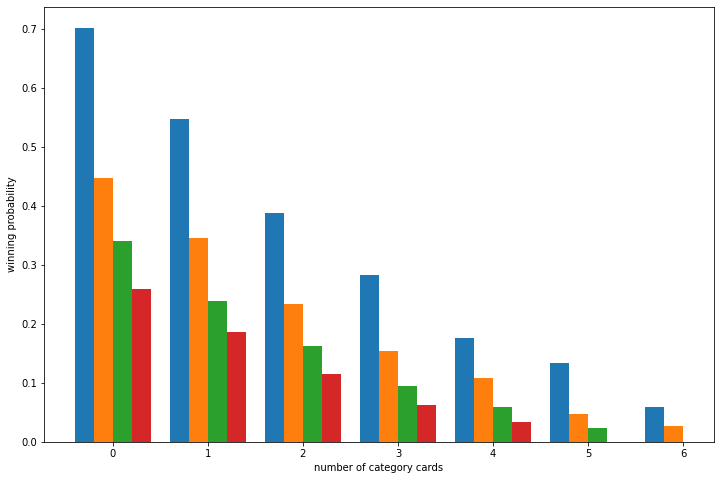

In [12]:
plt.figure(figsize=figsize)
for i, num in enumerate(range(winning_df["numPlayers"].min(), winning_df["numPlayers"].max()+1)):
    plt.bar(x = np.arange(winning_df[winning_df["numPlayers"] == num][cardColumn].max()+1)+i*width, height = winning_df[winning_df["numPlayers"] == num]["probabilityEnding"], width = width)
plt.xticks(r+width*diff/2, r)
plt.xlabel("number of category cards")
plt.ylabel("winning probability")
plt.show()

What is the probability that I will end up in position X given I have Y extreme cards? - probability on y-axis, final position on x axis. Look at individual game sizes, make a figure with multiple plots. Multiple bars per plot for each number of extreme cards. For example, this answers: If I have 4 extreme cards, what is the probability I will be in 1st place? 2nd place?, etc?

Plot parameters:

In [13]:
numPlayers = 4
diff = df[df["numPlayers"] == numPlayers][cardColumn].max() - df[df["numPlayers"] == numPlayers][cardColumn].min()
width = 1/(diff+2)
r = np.arange(df[df["numPlayers"] == numPlayers]["finalPosition"].max()+1)

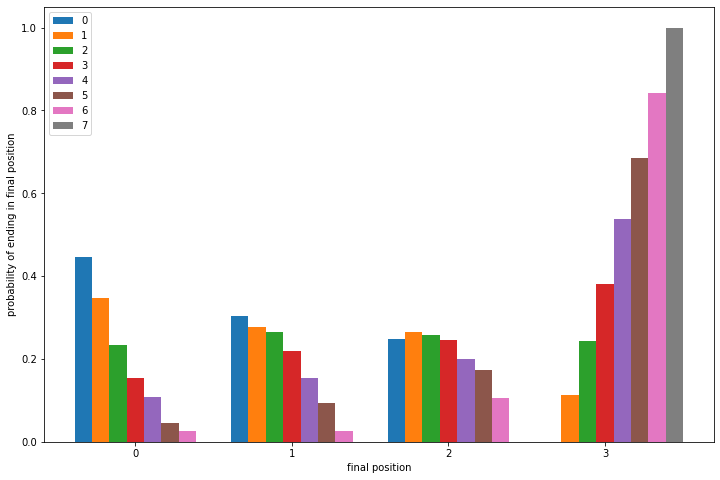

In [14]:
plt.figure(figsize=figsize)
for i, num in enumerate(range(df[df["numPlayers"] == numPlayers][cardColumn].min(), df[df["numPlayers"] == numPlayers][cardColumn].max()+1)):
    plt.bar(x = df[(df["numPlayers"] == numPlayers) & (df[cardColumn] == num)]["finalPosition"]+i*width, height = df[(df["numPlayers"] == numPlayers) & (df[cardColumn] == num)]["probabilityEnding"], width = width, align = "edge")
plt.xticks(r+width*(diff)/2, r)
plt.xlabel("final position")
plt.ylabel("probability of ending in final position")
plt.legend([i for i in range(diff+1)])
plt.show()

### 2. What influences you getting the block?
Approach
- Correlation matrix, heat map

In [15]:
smart_games[smart_games["numPlayers"] == 3]

,numPlayers,numSmart,numDumb,numRandom,game,turns,rounds,playerName,kind,cardsDealt,...,turnWithFirstBlock,turnWithFirstBlockProp,numCenter,numOpener,numExtremes,suit0Extremes,suit1Extremes,suit2Extremes,suit3Extremes,combinationID
0,3,3,0,0,0,68,20,0,smart,18,...,2,0.100000,1,1,3,1,1,1,0,1
1,3,3,0,0,0,68,20,1,smart,17,...,8,0.400000,2,2,3,1,0,1,1,1
2,3,3,0,0,0,68,20,2,smart,17,...,13,0.650000,1,5,2,0,1,0,1,1
3,3,3,0,0,1,81,30,0,smart,18,...,9,0.300000,3,1,2,0,0,0,2,1
4,3,3,0,0,1,81,30,1,smart,17,...,0,0.000000,0,4,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,3,0,0,4998,61,16,1,smart,17,...,13,0.812500,2,3,4,0,1,2,1,1
14996,3,3,0,0,4998,61,16,2,smart,17,...,10,0.625000,1,3,3,1,1,0,1,1
14997,3,3,0,0,4999,76,28,0,smart,18,...,9,0.321429,2,2,4,1,0,2,1,1
14998,3,3,0,0,4999,76,28,1,smart,17,...,12,0.428571,2,2,3,1,1,0,1,1


In [16]:
h = smart_games[smart_games["numPlayers"] == 3][['timesBlockTaken',
       'totalRoundsWithBlock', 'totalRoundsWithBlockProp',
       'mostRoundsWithBlock', 'mostRoundsWithBlockProp', 'turnWithFirstBlock',
       'turnWithFirstBlockProp', 'numCenter', 'numOpener', 'numExtremes',
       'suit0Extremes', 'suit1Extremes', 'suit2Extremes', 'suit3Extremes']].corr()

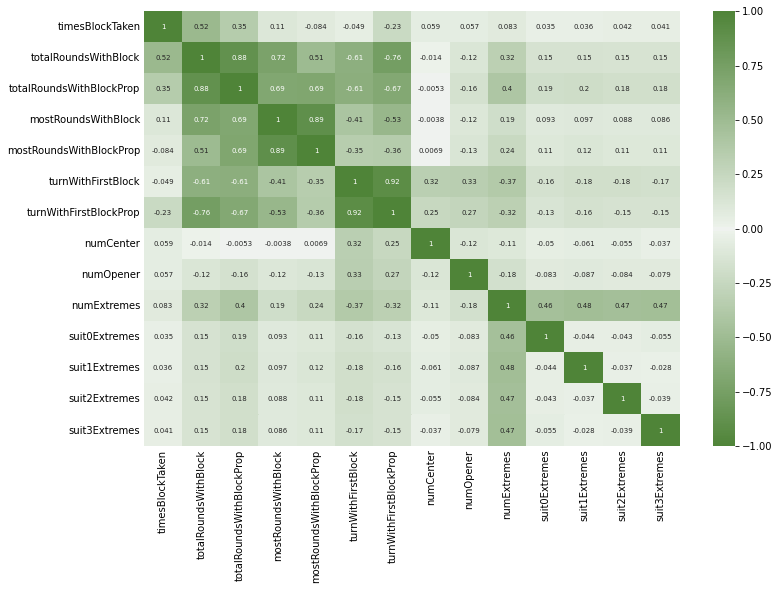

In [17]:
plt.figure(figsize=figsize)
ax = sns.heatmap(h, annot=True, center = 0, cmap = sns.diverging_palette(120,120, as_cmap=True), vmax=1, vmin=-1, annot_kws={"size": 7})
ax.tick_params(axis='both', which='both', length=0)
plt.show()

### 3. Averages

In [18]:
means = data.groupby(["combinationID", "numPlayers"])[['rounds', 'roundsPlayer', 'timesBlockTaken',
       'totalRoundsWithBlock', 'totalRoundsWithBlockProp',
       'mostRoundsWithBlock', 'mostRoundsWithBlockProp', 'turnWithFirstBlock',
       'turnWithFirstBlockProp']].mean().reset_index()
means

,combinationID,numPlayers,rounds,roundsPlayer,timesBlockTaken,totalRoundsWithBlock,totalRoundsWithBlockProp,mostRoundsWithBlock,mostRoundsWithBlockProp,turnWithFirstBlock,turnWithFirstBlockProp
0,1,3,22.49960,21.785333,3.034000,7.173533,0.313759,4.949533,0.219901,8.891333,0.422041
1,1,4,17.34260,16.508050,3.541150,5.600750,0.324772,3.705050,0.218230,5.999950,0.370191
2,1,5,14.25180,13.311200,3.582240,4.666760,0.334453,3.040920,0.221334,4.510080,0.344105
3,1,6,12.23400,11.199100,3.500367,4.074567,0.346057,2.656967,0.228943,3.592233,0.326507
4,2,3,21.44625,20.998333,2.172083,5.817500,0.255914,4.461667,0.199187,9.229167,0.455633
5,2,4,16.63000,16.087500,2.446875,4.647500,0.274425,3.531875,0.212375,6.595000,0.419814
6,2,5,13.42250,12.849500,2.501000,3.815000,0.288579,2.834000,0.216955,4.936500,0.389774
7,2,6,11.18000,10.577917,2.361250,3.148333,0.291387,2.345417,0.218868,4.097917,0.394295
8,3,4,16.91500,16.276875,2.841250,5.059375,0.297880,3.647500,0.218406,6.391875,0.403713
9,3,5,13.45000,12.936000,2.794000,4.029500,0.303674,2.923500,0.223448,4.983000,0.394575


Which combination has the highest average total rounds with block per player?

In [19]:
means[means["numPlayers"] == 4].sort_values(by = "totalRoundsWithBlockProp", ascending = False)["combinationID"].reset_index(drop=True)

0    1
1    5
2    4
3    3
4    6
5    8
6    2
7    7
Name: combinationID, dtype: int64

Results make sense, smarter players will have the block for longer because the other players will disadvantage others.

In [44]:
data[(data["numPlayers"] == 4) & (data["combinationID"] == 2)].groupby(["kind", "finalPosition"]).apply(lambda x:x.count())

numPlayers  numSmart  numDumb  numRandom  game  turns  \
kind  finalPosition                                                          
dumb  0                     240       240      240        240   240    240   
      1                     275       275      275        275   275    275   
      2                     318       318      318        318   318    318   
      3                     367       367      367        367   367    367   
smart 0                     160       160      160        160   160    160   
      1                     125       125      125        125   125    125   
      2                      82        82       82         82    82     82   
      3                      33        33       33         33    33     33   

                     rounds  playerName  kind  cardsDealt  ...  \
kind  finalPosition                                        ...   
dumb  0                 240         240   240         240  ...   
      1                 275         275   275         275  ...   
      2                 318         318   318         318  ...   
      3                 367         367   367         367  ...   
smart 0                 160         160   160         160  ...   
      1                 125         125   125         125  ...   
      2                  82          82    82          82  ...   
      3                  33          33    33          33  ...   

                     turnWithFirstBlock  turnWithFirstBlockProp  numCenter  \
kind  finalPosition                                                          
dumb  0                             240                     240        240   
      1                             275                     275        275   
      2                             318                     318        318   
      3                             367                     367        367   
smart 0                             160                     160        160   
      1                             125                     125        125   
      2                              82                      82         82   
      3                              33                      33         33   

                     numOpener  numExtremes  suit0Extremes  suit1Extremes  \
kind  finalPosition                                                         
dumb  0                    240          240            240            240   
      1                    275          275            275            275   
      2                    318          318            318            318   
      3                    367          367            367            367   
smart 0                    160          160            160            160   
      1                    125          125            125            125   
      2                     82           82             82             82   
      3                     33           33             33             33   

                     suit2Extremes  suit3Extremes  combinationID  
kind  finalPosition                                               
dumb  0                        240            240            240  
      1                        275            275            275  
      2                        318            318            318  
      3                        367            367            367  
smart 0                        160            160            160  
      1                        125            125            125  
      2                         82             82             82  
      3                         33             33             33  

[8 rows x 28 columns]